# Initialization

In [7]:
import os 

%load_ext autoreload
%autoreload 2

os.chdir("/Users/antoineluciano/Documents/Recherche/permABC_new/permABC")


from vanilla import abc_vanilla, perm_abc_vanilla
from smc import abc_smc, perm_abc_smc
from over_sampling import perm_abc_smc_os
from under_matching import perm_abc_smc_um  
from kernels import KernelTruncatedRW
from distances import optimal_index_distance
from models.Gaussian_with_no_summary_stats import GaussianWithNoSummaryStats
from jax import random
import numpy as np
import jax.numpy as jnp
from scipy.stats import invgamma
import matplotlib.pyplot as plt
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
key = random.PRNGKey(0)
key, subkey = random.split(key)
K = 10
n = 10
sigma0 = 10
alpha, beta = 5,5
model = GaussianWithNoSummaryStats(K = K, n_obs= n, sigma_0 = sigma0, alpha = alpha, beta = beta)
true_theta = model.prior_generator(subkey, 1)
# true_theta.loc = np.linspace(-2*sigma0, 2*sigma0, K)[None,:, None]
true_theta.glob = np.array([1.])[None,:]
key, subkey = random.split(key)
y_obs = model.data_generator(subkey, true_theta)
print(y_obs.shape)

(1, 10, 10)


# permABC 

In [2]:
key, subkey = random.split(key)
N_points = 1000000
model.reset_weights_distance()
key, key_theta, key_perm = random.split(key, 3)
thetas = model.prior_generator(key_theta, N_points)
zs = model.data_generator(key, thetas)
dists_perm, ys_index, zs_index, _ = optimal_index_distance(model, zs, y_obs)
thetas_perm = thetas.apply_permutation(zs_index)

mus_perm_van = thetas_perm.loc.squeeze()
betas_perm_van = thetas_perm.glob.squeeze()

NameError: name 'random' is not defined

# Over Sampling

In [19]:
np.array(M_values(75, .95)), np.array(dico[1.][75][.95][True]["M_values"])

(array([75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59,
        58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,
        41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25,
        24, 23, 22, 21, 20, 19, 18, 17, 16, 15]),
 array([75, 72, 69, 66, 63, 60, 57, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36,
        34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18,
        17, 16, 15]))

In [4]:
alphas_epsilon = np.array([1., .1, .05,  .01, .005, .001])
epsilons = np.quantile(dists_perm, alphas_epsilon)
M0s = np.array([1.2*K, 1.5*K, 1.8*K, 2*K,  5*K, 7*K], dtype=int)
alphas_M = np.array([.95, .9, .75, .7])

kernel = KernelTruncatedRW 
N_smc = 1000
dico = {}

for epsilon, alpha_epsilon in zip(epsilons, alphas_epsilon): 
    dico[alpha_epsilon] = {}
    for M0 in M0s: 
        dico[alpha_epsilon][M0] = {}
        for alpha_M in alphas_M: 
            dico[alpha_epsilon][M0][alpha_M] = {}
            for duplicate in [True, False]:
                print("\n\n\n----------------------\nALPHA = {:.2f} EPSILON = {:.2f} M0 = {} ALPHA_M = {:.2f} DUPLICATE = {}\n----------------------\n\n\n".format(alpha_epsilon, epsilon, M0, alpha_M, duplicate))
                out_os = perm_abc_smc_os(key, model, N_smc, y_obs, kernel, M0, epsilon, alpha_M = alpha_M, update_weights_distance= False, verbose = 2, duplicate = duplicate) 
                dico[alpha_epsilon][M0][alpha_M][duplicate] = out_os
     




----------------------
ALPHA = 5.00 EPSILON = 174.44 M0 = 18 ALPHA_M = 0.95 DUPLICATE = True
----------------------



a) Simulation of the first particles:
b) Computing the first distances: Performing full optimal assignment (no prior indices).
Minimum distance: 0.00062156306 Maximum distance: 156.5216 Number of NaNs: 0
min = 1.0 max = 5.3e+01 mean = 1.1e+01
d) Setting the first weights: ESS = 1000
Iteration 0: M = 18 Epsilon = 174.44493103027344, ESS = 1000 Acc. rate = 100% Numb. unique particles = 1000

a) Update M: new M = 17 old M = 18
b) Duplicate particles
Duplicating the 1000 alive particles in 5 copies...
(5000, 18) 5
Now particles of shape (6000, 18, 1) and (6000, 18, 10) with 6000 unique particles
c) Truncate particles: before (6000, 18, 1),(6000, 18, 10) after (6000, 17, 1),(6000, 17, 10)
d) Compute optimal distances: 1000 unique alive particles Performing full optimal assignment (no prior indices).
Minimum distance: 0.00062156306 Maximum distance: 156.5216 Number of NaN

/Users/antoineluciano/.pyenv/versions/3.10.13/envs/jax_env/lib/python3.10/site-packages/jax/_src/numpy/reductions.py:289: RuntimeWarning: overflow encountered in cast
  return _reduce_sum(a, axis=_ensure_optional_axes(axis), dtype=dtype, out=out,


Sample proposal: loc min = -4.2e+01 max 4e+01 mean = -0.01 glob min = 0.00012 max = 7.7 mean = 1.5
2. MH acceptance: ratio min = 0.0 max = 1.0 mean 0.097
Prior ratio: min = -4.08e+04, max = 4.5, mean = -47.3
Kernel ratio: min = -1.53e+02, max = 5.03, mean = -14.9
3. Results: Acceptance = 10.20% Rejection ABC = 0.00% Rejection MH = 89.80%
Iteration 15: M = 40 Espilon = 174.4449, ESS = 1000 Acc. rate = 10.20% Uniqueness rate particules = 100.0% Uniqueness rate components = 100.0% Global parameters uniqueness rate = 100.0%

a) Update M: new M = 38 old M = 40
c) Truncate particles: before (1000, 40, 1),(1000, 40, 10) after (1000, 38, 1),(1000, 38, 10)
d) Compute optimal distances: 1000 unique alive particles Performing full optimal assignment (no prior indices).
Minimum distance: 0.00045952524 Maximum distance: 166.69966 Number of NaNs: 0
e) Weights update/Killing of the particles: Old ESS = 1000 New ESS = 1000 (0.00% of the particles killed)
f) Resampling: No resampling
g) Move particles:

/Users/antoineluciano/.pyenv/versions/3.10.13/envs/jax_env/lib/python3.10/site-packages/jax/_src/numpy/reductions.py:289: RuntimeWarning: overflow encountered in cast
  return _reduce_sum(a, axis=_ensure_optional_axes(axis), dtype=dtype, out=out,


Sample proposal: loc min = -2.2e+38 max 4.3e+01 mean = -2.6e+33 glob min = 0.0014 max = 8.1 mean = 1.5
2. MH acceptance: ratio min = 0.0 max = 1.0 mean 0.135
Prior ratio: min = -inf, max = 4.31, mean = -inf
Kernel ratio: min = nan, max = nan, mean = nan
3. Results: Acceptance = 14.60% Rejection ABC = 0.00% Rejection MH = 85.40%
Iteration 6: M = 83 Espilon = 174.4449, ESS = 1000 Acc. rate = 14.60% Uniqueness rate particules = 100.0% Uniqueness rate components = 99.8% Global parameters uniqueness rate = 100.0%

a) Update M: new M = 79 old M = 83
c) Truncate particles: before (1000, 83, 1),(1000, 83, 10) after (1000, 79, 1),(1000, 79, 10)
d) Compute optimal distances: 1000 unique alive particles Performing full optimal assignment (no prior indices).
Minimum distance: 0.00030034818 Maximum distance: 190.60889 Number of NaNs: 0
e) Weights update/Killing of the particles: Old ESS = 1000 New ESS = 1000 (0.00% of the particles killed)
f) Resampling: No resampling
g) Move particles:
1. Forward 

/Users/antoineluciano/.pyenv/versions/3.10.13/envs/jax_env/lib/python3.10/site-packages/jax/_src/numpy/reductions.py:289: RuntimeWarning: overflow encountered in cast
  return _reduce_sum(a, axis=_ensure_optional_axes(axis), dtype=dtype, out=out,


Sample proposal: loc min = -2.2e+38 max 4.3e+01 mean = -2.6e+33 glob min = 0.0014 max = 8.1 mean = 1.5
2. MH acceptance: ratio min = 0.0 max = 1.0 mean 0.135
Prior ratio: min = -inf, max = 4.31, mean = -inf
Kernel ratio: min = nan, max = nan, mean = nan
3. Results: Acceptance = 14.60% Rejection ABC = 0.00% Rejection MH = 85.40%
Iteration 6: M = 83 Espilon = 7.1049, ESS = 1000 Acc. rate = 14.60% Uniqueness rate particules = 100.0% Uniqueness rate components = 99.8% Global parameters uniqueness rate = 100.0%

a) Update M: new M = 79 old M = 83
c) Truncate particles: before (1000, 83, 1),(1000, 83, 10) after (1000, 79, 1),(1000, 79, 10)
d) Compute optimal distances: 1000 unique alive particles Performing full optimal assignment (no prior indices).
Minimum distance: 0.00030034818 Maximum distance: 190.60889 Number of NaNs: 0
e) Weights update/Killing of the particles: Old ESS = 1000 New ESS = 1000 (0.00% of the particles killed)
f) Resampling: No resampling
g) Move particles:
1. Forward ke

/Users/antoineluciano/.pyenv/versions/3.10.13/envs/jax_env/lib/python3.10/site-packages/jax/_src/numpy/reductions.py:289: RuntimeWarning: overflow encountered in cast
  return _reduce_sum(a, axis=_ensure_optional_axes(axis), dtype=dtype, out=out,


Sample proposal: loc min = -2.6e+38 max 4.2e+01 mean = -5.3e+33 glob min = 0.0004 max = 7.8 mean = 1.5
2. MH acceptance: ratio min = 0.0 max = 1.0 mean 0.11
Prior ratio: min = -inf, max = 3.96, mean = -inf
Kernel ratio: min = nan, max = nan, mean = nan
3. Results: Acceptance = 9.66% Rejection ABC = 0.50% Rejection MH = 89.84%
Iteration 17: M = 50 Espilon = 7.1049, ESS = 994 Acc. rate = 9.66% Uniqueness rate particules = 100.0% Uniqueness rate components = 100.0% Global parameters uniqueness rate = 100.0%

a) Update M: new M = 48 old M = 50
c) Truncate particles: before (1000, 50, 1),(1000, 50, 10) after (1000, 48, 1),(1000, 48, 10)
d) Compute optimal distances: 994 unique alive particles Performing full optimal assignment (no prior indices).
Minimum distance: 0.00056608324 Maximum distance: 183.9627 Number of NaNs: 0
e) Weights update/Killing of the particles: Old ESS = 994 New ESS = 991 (0.30% of the particles killed)
f) Resampling: No resampling
g) Move particles:
1. Forward kernel: 

/Users/antoineluciano/.pyenv/versions/3.10.13/envs/jax_env/lib/python3.10/site-packages/jax/_src/numpy/reductions.py:289: RuntimeWarning: overflow encountered in cast
  return _reduce_sum(a, axis=_ensure_optional_axes(axis), dtype=dtype, out=out,


Sample proposal: loc min = -2.2e+38 max 4.3e+01 mean = -2.6e+33 glob min = 0.0014 max = 8.1 mean = 1.5
2. MH acceptance: ratio min = 0.0 max = 1.0 mean 0.135
Prior ratio: min = -inf, max = 4.31, mean = -inf
Kernel ratio: min = nan, max = nan, mean = nan
3. Results: Acceptance = 14.60% Rejection ABC = 0.00% Rejection MH = 85.40%
Iteration 6: M = 83 Espilon = 5.7678, ESS = 1000 Acc. rate = 14.60% Uniqueness rate particules = 100.0% Uniqueness rate components = 99.8% Global parameters uniqueness rate = 100.0%

a) Update M: new M = 79 old M = 83
c) Truncate particles: before (1000, 83, 1),(1000, 83, 10) after (1000, 79, 1),(1000, 79, 10)
d) Compute optimal distances: 1000 unique alive particles Performing full optimal assignment (no prior indices).
Minimum distance: 0.00030034818 Maximum distance: 190.60889 Number of NaNs: 0
e) Weights update/Killing of the particles: Old ESS = 1000 New ESS = 1000 (0.00% of the particles killed)
f) Resampling: No resampling
g) Move particles:
1. Forward ke

In [ ]:
dico[alpha_epsilon][M0][alpha_M][True]["U"]

For alpha_epsilon = 1.00, M0 = 30, alpha_M = 0.90, duplicate = True, N_sim = 279000, unique = 1.0, time = 3.1246540546417236
For alpha_epsilon = 1.00, M0 = 30, alpha_M = 0.90, duplicate = False, N_sim = 279000, unique = 1.0, time = 1.419914722442627
For alpha_epsilon = 0.10, M0 = 30, alpha_M = 0.90, duplicate = True, N_sim = 279000, unique = 1.0, time = 5.2619078159332275
For alpha_epsilon = 0.10, M0 = 30, alpha_M = 0.90, duplicate = False, N_sim = 225477, unique = 0.449, time = 25.90902018547058
For alpha_epsilon = 0.01, M0 = 30, alpha_M = 0.90, duplicate = True, N_sim = 279000, unique = 1.0, time = 9.311430215835571
For alpha_epsilon = 0.01, M0 = 30, alpha_M = 0.90, duplicate = False, N_sim = 227159, unique = 0.19, time = 56.102404832839966
For alpha_epsilon = 1.00, M0 = 30, alpha_M = 0.75, duplicate = True, N_sim = 185000, unique = 1.0, time = 2.9498722553253174
For alpha_epsilon = 1.00, M0 = 30, alpha_M = 0.75, duplicate = False, N_sim = 185000, unique = 1.0, time = 0.9730818271636

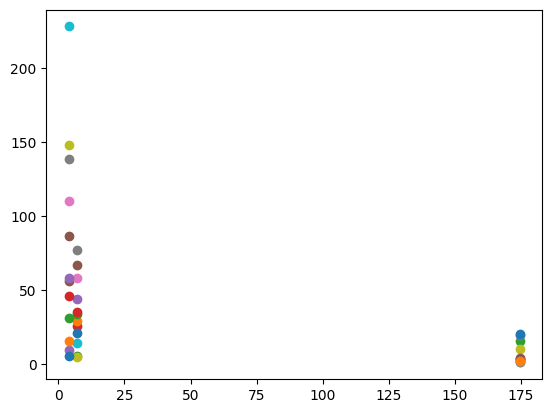

In [28]:
for M0 in M0s: 
    for alpha_M in alphas_M: 
        for epsilon, alpha_epsilon in zip(epsilons, alphas_epsilon):
            for duplicate in [True, False]:
                nsim = np.sum(dico[alpha_epsilon][M0][alpha_M][duplicate]["N_sim"])
                unique = dico[alpha_epsilon][M0][alpha_M][duplicate]["unique_part"][-1]
                time = np.sum(dico[alpha_epsilon][M0][alpha_M][duplicate]['Time'])
                print("For alpha_epsilon = {:.2f}, M0 = {}, alpha_M = {:.2f}, duplicate = {}, N_sim = {}, unique = {}, time = {}".format(alpha_epsilon, M0, alpha_M, duplicate, nsim, unique, time))
                plt.scatter(epsilon, time)
           

[66.0, 155.7223650385604, 200.1885521885522, 306.9767441860465, 402.4390243902439, 377.14285714285717] [174.44493103   7.10487142   5.76779749   3.87727611   3.31846996
   2.38281977]
[66.0, 154.73469387755102, 185.47040498442368, 306.9767441860465, 352.94117647058823, 379.3103448275862] [174.44493103   7.10487142   5.76779749   3.87727611   3.31846996
   2.38281977]
[66.0, 149.4384236453202, 190.36421725239617, 308.41121495327104, 404.9079754601227, 381.5028901734104] [174.44493103   7.10487142   5.76779749   3.87727611   3.31846996
   2.38281977]
[66.0, 148.7960687960688, 196.66225165562915, 297.2972972972973, 370.7865168539326, 370.7865168539326] [174.44493103   7.10487142   5.76779749   3.87727611   3.31846996
   2.38281977]
[148.0, 281.3080459770115, 367.3655589123867, 523.138775510204, 615.5288461538462, 645.1941747572815] [174.44493103   7.10487142   5.76779749   3.87727611   3.31846996
   2.38281977]
[148.0, 277.83673469387753, 342.249299719888, 581.8733031674208, 620.800970873

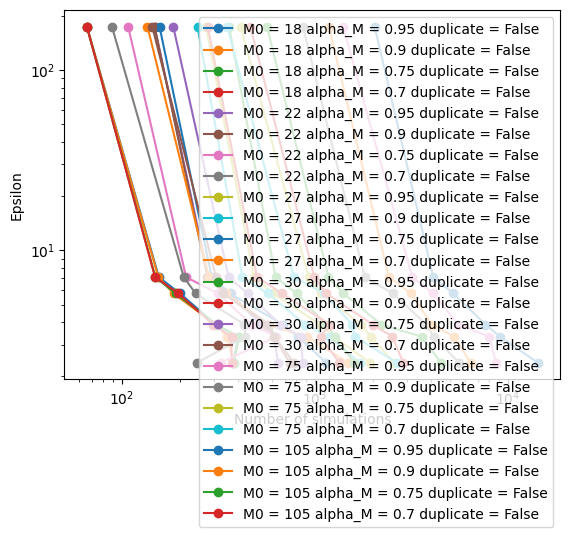

In [70]:
alphas_epsilon = np.array([1., .1, .05,  .01, .005, .001])
epsilons = np.quantile(dists_perm, alphas_epsilon)
M0s = np.array([1.2*K, 1.5*K, 1.8*K, 2*K,  5*K, 7*K], dtype=int)
alphas_M = np.array([.95, .9, .75, .7])
for M0 in M0s: 
    for alpha_M in alphas_M: 
        for duplicate in [False]:
            epsilonss = []
            nsims = []
            for epsilon, alpha_epsilon in zip(epsilons, alphas_epsilon): 
            
                nsim = np.sum(dico[alpha_epsilon][M0][alpha_M][duplicate]["N_sim"])
                epsilonn = dico[alpha_epsilon][M0][alpha_M][duplicate]["Eps_values"][-1]
                unique = dico[alpha_epsilon][M0][alpha_M][duplicate]["unique_part"][-1]
                epsilonss.append(epsilonn)
                nsims.append(nsim/(N_smc*unique))
            print(nsims, epsilons)
            plt.plot(nsims,epsilons, label = "M0 = {} alpha_M = {} duplicate = {}".format(M0, alpha_M, duplicate), marker = "o", linestyle = "-")
plt.xlabel("Number of simulations")
plt.ylabel("Epsilon")
plt.xscale("log")
plt.yscale("log")
plt.legend()


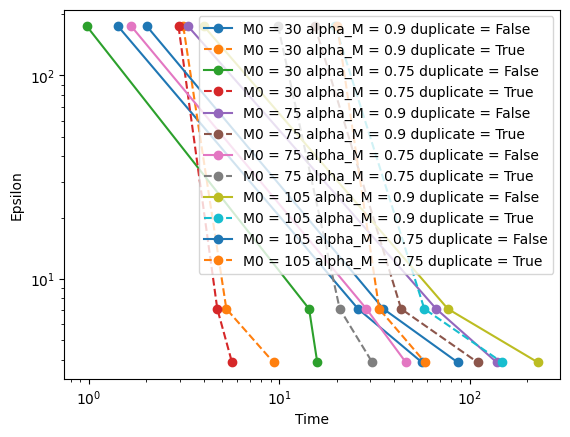

In [ ]:
alphas_epsilon = np.array([1., .1,  .01])
epsilons = np.quantile(dists_perm, alphas_epsilon)
M0s = np.array([ 2*K,  5*K, 7*K], dtype=int)
alphas_M = np.array([.9, .75])
for M0 in M0s: 
    for alpha_M in alphas_M: 
        for duplicate in [False, True]:
            epsilonss = []
            nsims = []
            times = []
            for epsilon, alpha_epsilon in zip(epsilons, alphas_epsilon): 
            
                nsim = np.sum(dico[alpha_epsilon][M0][alpha_M][duplicate]["N_sim"])
                epsilonn = dico[alpha_epsilon][M0][alpha_M][duplicate]["Eps_values"][-1]
                unique = dico[alpha_epsilon][M0][alpha_M][duplicate]["unique_part"][-1]
                epsilonss.append(epsilonn)
                nsims.append(nsim/(N_smc*unique))
                times.append(np.sum(dico[alpha_epsilon][M0][alpha_M][duplicate]['Time']))
            if duplicate: 
                plt.plot(times,epsilonss, label = "M0 = {} alpha_M = {} duplicate = {}".format(M0, alpha_M, duplicate), marker = "o", linestyle = "--")
            else:
                plt.plot(times,epsilons, label = "M0 = {} alpha_M = {} duplicate = {}".format(M0, alpha_M, duplicate), marker = "o", linestyle = "-")
plt.xlabel("Time")
plt.ylabel("Epsilon")
plt.xscale("log")
plt.yscale("log")
plt.legend()

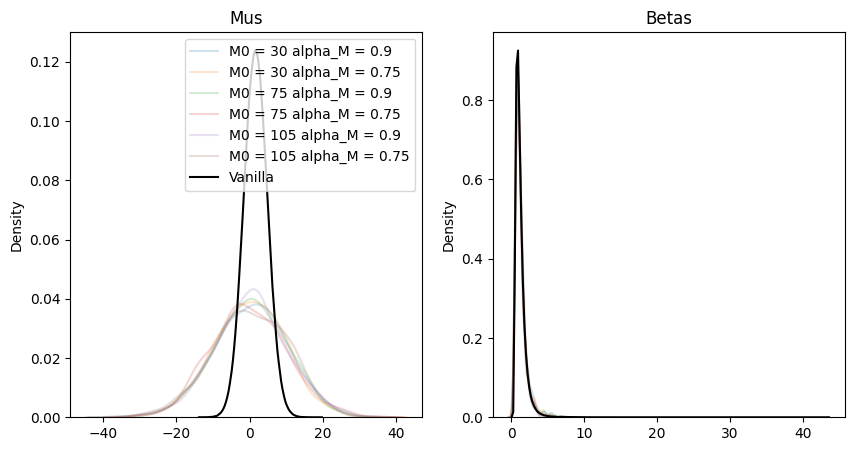

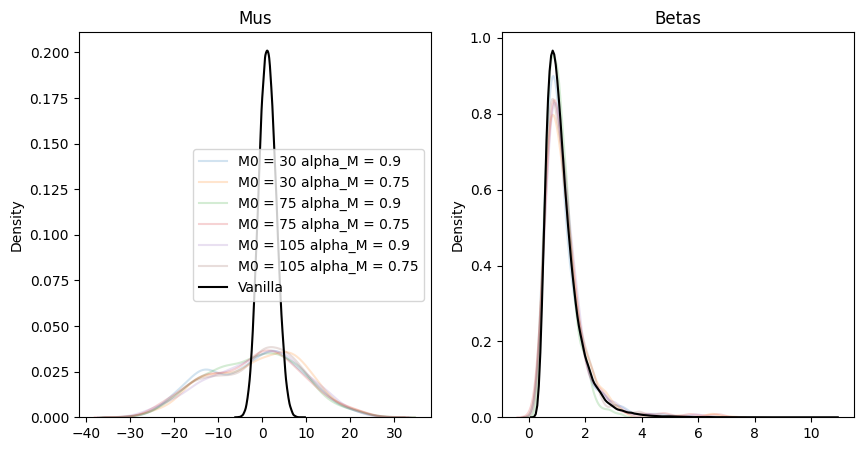

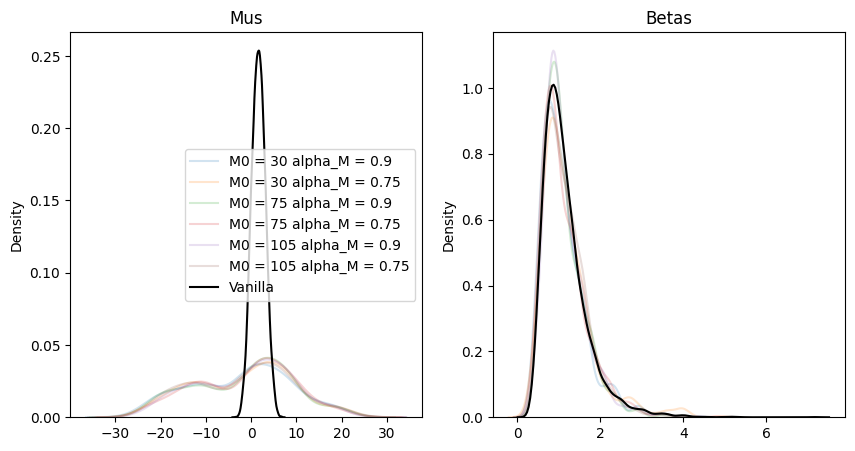

In [38]:
k = 1
for epsilon, alpha_epsilon in zip(epsilons, alphas_epsilon):
    f, ax = plt.subplots(1, 2, figsize=(10, 5)) 
    for M0 in M0s: 
        for alpha_M in alphas_M: 
            duplicate = True
            mus = dico[alpha_epsilon][M0][alpha_M][duplicate]["Thetas"][-1].loc.squeeze()
            betas = dico[alpha_epsilon][M0][alpha_M][duplicate]["Thetas"][-1].glob.squeeze()
            
            sns.kdeplot(mus[:,k], ax = ax[0], label = "M0 = {} alpha_M = {}".format(M0, alpha_M), alpha = .2)
            sns.kdeplot(betas, ax = ax[1], label = "M0 = {} alpha_M = {}".format(M0, alpha_M), alpha = .2)
    sns.kdeplot(mus_perm_van[np.where(dists_perm < epsilon)[0], k], ax = ax[0], label = "Vanilla", color = "black")
    sns.kdeplot(betas_perm_van[np.where(dists_perm < epsilon)[0]], ax = ax[1], label = "Vanilla", color = "black")
    
    ax[0].set_title("Mus")
    ax[1].set_title("Betas")
    ax[0].legend()
    plt.show()

In [55]:
dists_perm.min()

0.846391

In [80]:
out_os_test = perm_abc_smc_os(key, model, N_smc, y_obs, kernel, M_0 = 3*K, epsilon = 1., alpha_M = .9, update_weights_distance= False, verbose = 2, duplicate = True, Final_iteration= 100)

a) Simulation of the first particles:
b) Computing the first distances: Performing full optimal assignment (no prior indices).
Minimum distance: 0.00032129942 Maximum distance: 138.31822 Number of NaNs: 0
min = 0.22 max = 8.7 mean = 1.2
d) Setting the first weights: ESS = 584
Iteration 0: M = 45 Epsilon = 1.0, ESS = 584 Acc. rate = 100% Numb. unique particles = 1000

a) Update M: new M = 42 old M = 45
b) Duplicate particles
Duplicating the 584 alive particles in 3 copies...
(1752, 45) 3
Now particles of shape (2752, 45, 1) and (2752, 45, 10) with 2752 unique particles
c) Truncate particles: before (2752, 45, 1),(2752, 45, 10) after (2752, 42, 1),(2752, 42, 10)
d) Compute optimal distances: 584 unique alive particles Performing full optimal assignment (no prior indices).
Minimum distance: 0.00032129942 Maximum distance: 127.96808 Number of NaNs: 0
e) Weights update/Killing of the particles: Old ESS = 2336 New ESS = 2040 (12.67% of the particles killed)
f) Resampling: Resampling... 941 u

In [68]:
from smc import perm_abc_smc

out_perm_smc = perm_abc_smc(key = key, model = model, n_particles= N_smc, y_obs = y_obs, kernel = kernel, epsilon_target= 1., update_weights_distance= False, verbose = 2, Final_iteration= 50)

Weights distance: min = 0.0628, max = 0.0719
Performing full optimal assignment (no prior indices).
Minimum distance: 0.00048311215 Maximum distance: 174.15736 Number of NaNs: 0
Weights distance: min = 0.0454, max = 0.0843
Iteration 0: Epsilon = inf, ESS = 1000 Acc. rate = 100% Numb. unique particles = 1000
a) Update Epsilon: new epsilon = 37.7
b) Update weights: Old ESS = 1000 New ESS = 950 (5.00% of particles killed)
c) Resampling: No resampling
d) Move particles: 1. Forward kernel: 
Performing full optimal assignment (no prior indices).
Minimum distance: 0.00028826404 Maximum distance: 180.56586 Number of NaNs: 0
Sample proposal: loc min = -4.7e+01 max 4.8e+01 mean = -0.1 glob min = 0.00096 max = 8.1 mean = 1.5
2. MH acceptance: ratio min = 0.0 max = 1.0 mean 0.203
Prior ratio: min = -5.18e+03, max = 4.76, mean = -11.9
Kernel ratio: min = -11.8, max = 4.26, mean = -0.473
3. Results: Acceptance = 21.37% Rejection ABC = 2.74% Rejection MH = 75.89%
Iteration 2: Espilon = 37.7004, ESS =

Text(0.5, 1.0, 'Betas')

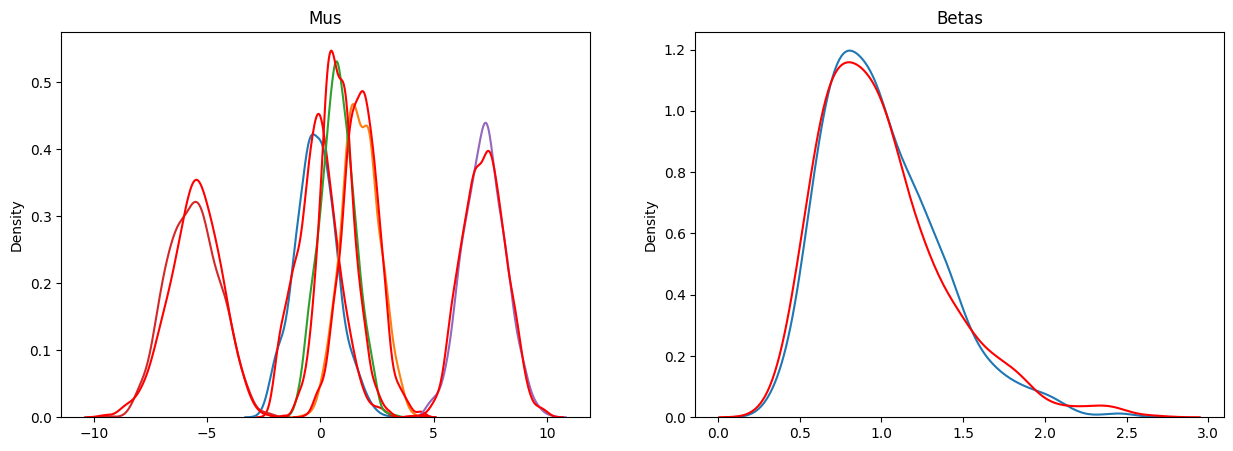

In [83]:
mus = (out_os_test["Thetas"][-1].loc.squeeze())
betas = np.unique(out_os_test["Thetas"][-1].glob.squeeze())
mus_perm_smc = (out_perm_smc["Thetas"][-1].loc.squeeze())
betas_perm_smc = np.unique(out_perm_smc["Thetas"][-1].glob.squeeze())
f, ax = plt.subplots(1, 2, figsize=(15, 5))
for k in range(5):
    sns.kdeplot(mus[:,k], ax = ax[0], label = "M0 = {} alpha_M = {}".format(M0, alpha_M), alpha = 1)

    sns.kdeplot(mus_perm_smc[:,k], ax = ax[0], label = "SMC", color = "red")
sns.kdeplot(betas, ax = ax[1], label = "M0 = {} alpha_M = {}".format(M0, alpha_M), alpha = 1)
sns.kdeplot(betas_perm_smc, ax = ax[1], label = "SMC", color = "red")
# print(len(np.where(dists_perm < 1.)[0]))
# sns.kdeplot(mus_perm_van[np.where(dists_perm < 1.)[0], k], ax = ax[0], label = "Vanilla", color = "black")
# sns.kdeplot(betas_perm_van[np.where(dists_perm < 1.)[0]], ax = ax[1], label = "Vanilla", color = "black")
ax[0].set_title("Mus")
ax[1].set_title("Betas")
# ax[0].legend()  

In [97]:
from distances import optimal_index_distance

# Dico OS

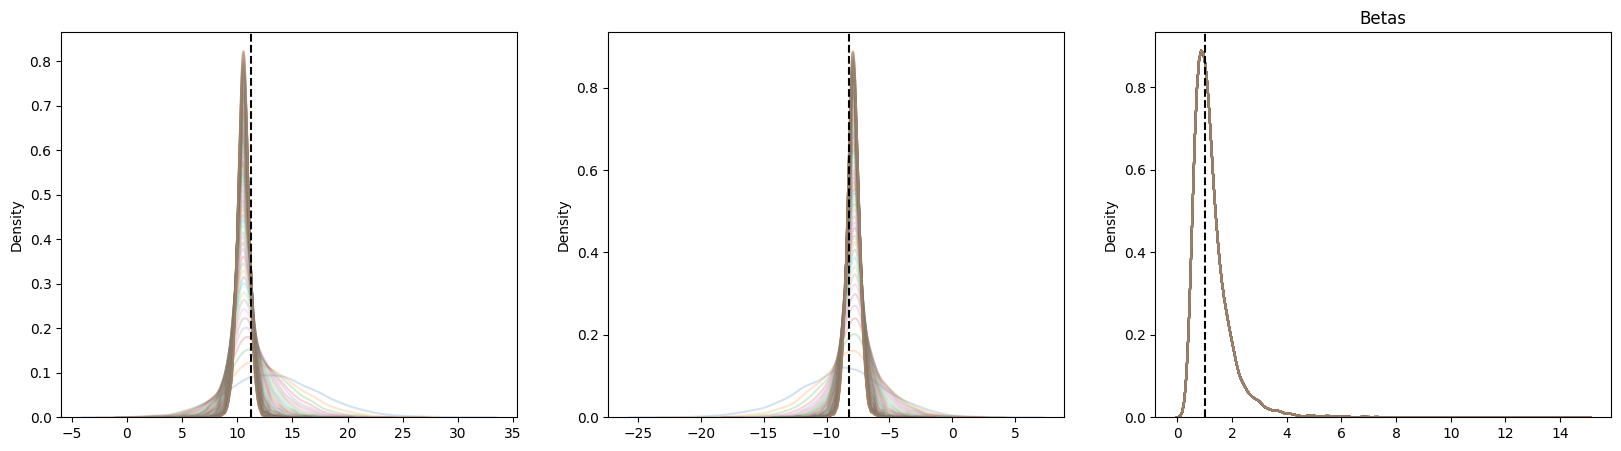

In [44]:

alpha_epsilon = .95
M0s = np.arange(K+1, 10*K)
N_OS = 10000
thetas = model.prior_generator(subkey, N_OS, n_silos= np.max(M0s))
zs = model.data_generator(key, thetas)
thetas_M = []
epsilons_os = np.zeros(len(M0s))
N_plot = 2
f, ax = plt.subplots(1, N_plot+1, figsize=(20, 5))
for j, M0 in enumerate(M0s):
    zs_os = zs.copy()[:, :M0]
    dists_perm, ys_index, zs_index, _ = optimal_index_distance(model, zs_os, y_obs, M = M0)
    epsilons_os[j] = np.quantile(dists_perm, alpha_epsilon)
    thetas_os=thetas.copy().apply_permutation(zs_index)
    for i in range(N_plot):
        sns.kdeplot(thetas_os.loc[:, i, 0], ax = ax[i], label = "M0 = {}".format(M0), alpha = .2)
    sns.kdeplot(thetas_os.glob[:, 0], ax = ax[N_plot], label = "M0 = {}".format(M0), alpha = .2)
    
    thetas_M.append(thetas_os)
# ax[N_plot].legend(
    
for i in range(N_plot):
    # ax[i].set_title(model.loc_names[i])
    ax[i].axvline(true_theta.loc[0, i, 0], color = "black", linestyle = "--")
ax[N_plot].axvline(true_theta.glob[0, 0], color = "black", linestyle = "--")
ax[N_plot].set_title("Betas")
plt.show()




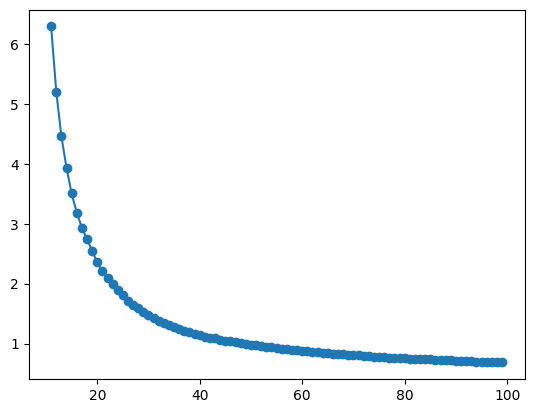

In [39]:
plt.plot(M0s, epsilons_os, label = "OS", marker = "o", linestyle = "-")

In [47]:
alphas_M = np.array([.95, .9, .75, .7, .65])
M0s = np.array([1.2*K, 1.5*K, 1.8*K, 2*K,  5*K, 7*K, 10*K, 12*K], dtype=int)

In [ ]:
dico_os = {}
N_smc = 1000
alpha_epsilon = .95
kernel = KernelTruncatedRW
alphas_M = np.array([.95, .9, .75, .7, .65])
M0s = np.array([1.2*K, 1.5*K, 1.8*K, 2*K,  5*K, 7*K, 10*K, 12*K], dtype=int)
for M0 in M0s: 
    key, subkey = random.split(key)
    thetas = model.prior_generator(subkey, N_smc, M0)
    key, subkey = random.split(key)
    
    zs = model.data_generator(subkey, thetas)
    dists_perm, ys_index, zs_index, _ = optimal_index_distance(model, zs, y_obs, M = M0)
    thetas_perm = thetas.apply_permutation(zs_index)
    
    epsilon = np.quantile(dists_perm, alpha_epsilon)
    print("Epsilon = {}".format(epsilon))
    dico_os[M0] = {}
    for alpha_M in alphas_M:
        
        key, subkey = random.split(key)
        dico_os[M0][alpha_M] = perm_abc_smc_os(key = subkey, model = model, n_particles= N_smc, y_obs = y_obs, kernel = kernel, M_0 = M0, epsilon = epsilon, alpha_M = alpha_M, update_weights_distance= False, verbose = 2, Final_iteration= 0, duplicate = True)
        
    

Epsilon = 5.381082844734192
a) Simulation of the first particles:
b) Computing the first distances: Performing full optimal assignment (no prior indices).
min = 1.1 max = 8.8 mean = 3.0
d) Setting the first weights: ESS = 961
Iteration 0: M = 12 Epsilon = 5.381082844734192, ESS = 961 Acc. rate = 100% Numb. unique particles = 1000

a) Update M: new M = 11 old M = 12
b) Duplicate particles
Duplicating the 961 alive particles in 5 copies...
(4805, 12) 5
Now particles of shape (5805, 12, 1) and (5805, 12, 10) with 5805 unique particles
c) Truncate particles: before (5805, 12, 1),(5805, 12, 10) after (5805, 11, 1),(5805, 11, 10)
d) Compute optimal distances: 961 unique alive particles Performing full optimal assignment (no prior indices).
e) Weights update/Killing of the particles: Old ESS = 5766 New ESS = 5272 (8.57% of the particles killed)
f) Resampling: Resampling... 987 unique particles left
g) Move particles:
1. Forward kernel: 
Performing full optimal assignment (no prior indices).
S

/Users/antoineluciano/.pyenv/versions/3.10.13/envs/jax_env/lib/python3.10/site-packages/jax/_src/interpreters/xla.py:155: RuntimeWarning: overflow encountered in cast
  return np.asarray(x, dtypes.canonicalize_dtype(x.dtype))


Sample proposal: loc min = -1.9e+38 max 4e+01 mean = -2e+33 glob min = 0.0022 max = 4.1 mean = 1.3
2. MH acceptance: ratio min = 0.0 max = 1.0 mean 0.44
Prior ratio: min = -inf, max = 3.37, mean = -inf
Kernel ratio: min = nan, max = nan, mean = nan
3. Results: Acceptance = 42.81% Rejection ABC = 14.16% Rejection MH = 43.03%
Iteration 3: M = 103 Espilon = 0.6558, ESS = 932 Acc. rate = 42.81% Uniqueness rate particules = 100.0% Uniqueness rate components = 99.9% Global parameters uniqueness rate = 100.0%

a) Update M: new M = 98 old M = 103
b) Duplicate particles
No duplication because n_duplicate = 1
c) Truncate particles: before (1000, 103, 1),(1000, 103, 10) after (1000, 98, 1),(1000, 98, 10)
d) Compute optimal distances: 932 unique alive particles Performing full optimal assignment (no prior indices).
e) Weights update/Killing of the particles: Old ESS = 932 New ESS = 915 (1.82% of the particles killed)
f) Resampling: No resampling
g) Move particles:
1. Forward kernel: 
Performing fu

In [ ]:
model.weights_distance

Array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667],      dtype=float32)

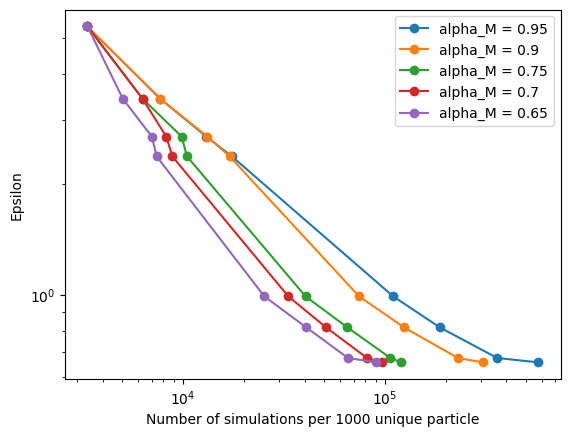

In [36]:
N_sample = 1000
for alpha_M in alphas_M:
    epsilons = []
    nsims = []
    uniques = []
    times = []
    
    for M0 in M0s:
        nsim = np.sum(dico_os[M0][alpha_M]["N_sim"])
        epsilonn = dico_os[M0][alpha_M]["Eps_values"][-1]
        uniquee = dico_os[M0][alpha_M]["unique_part"][-1]
        timee = np.sum(dico_os[M0][alpha_M]['Time'])
        epsilons.append(epsilonn)
        nsims.append(nsim/(N_smc*uniquee*K)*N_sample)
        uniques.append(uniquee)
        times.append(timee)
    plt.plot(nsims, epsilons, label = "alpha_M = {}".format(alpha_M), marker = "o", linestyle = "-")
plt.xlabel("Number of simulations per {} unique particle".format(N_sample))
plt.ylabel("Epsilon")
plt.xscale("log")
plt.yscale("log")
plt.legend()

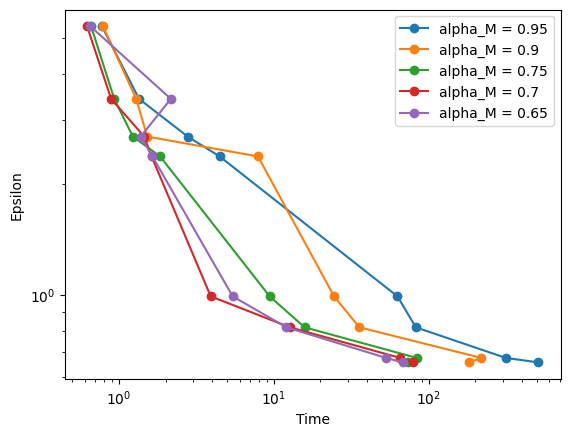

In [37]:
for alpha_M in alphas_M:
    epsilons = []
    nsims = []
    uniques = []
    times = []
    
    for M0 in M0s:
        nsim = np.sum(dico_os[M0][alpha_M]["N_sim"])
        epsilonn = dico_os[M0][alpha_M]["Eps_values"][-1]
        uniquee = dico_os[M0][alpha_M]["unique_part"][-1]
        timee = np.sum(dico_os[M0][alpha_M]['Time'])
        epsilons.append(epsilonn)
        nsims.append(nsim/(N_smc*uniquee))
        uniques.append(uniquee)
        times.append(timee)
    plt.plot(times, epsilons, label = "alpha_M = {}".format(alpha_M), marker = "o", linestyle = "-")
plt.xlabel("Time")
plt.ylabel("Epsilon")
plt.xscale("log")
plt.yscale("log")
plt.legend()

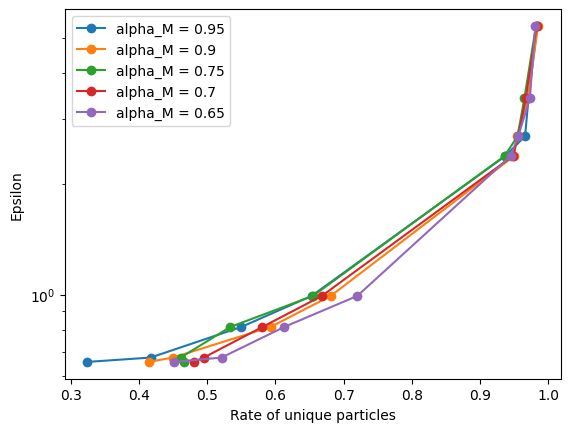

In [20]:
for alpha_M in alphas_M:
    epsilons = []
    nsims = []
    uniques = []
    times = []
    
    for M0 in M0s:
        nsim = np.sum(dico_os[M0][alpha_M]["N_sim"])
        epsilonn = dico_os[M0][alpha_M]["Eps_values"][-1]
        uniquee = dico_os[M0][alpha_M]["unique_part"][-1]
        timee = np.sum(dico_os[M0][alpha_M]['Time'])
        epsilons.append(epsilonn)
        nsims.append(nsim/(N_smc*uniquee))
        uniques.append(uniquee)
        times.append(timee)
    plt.plot(uniques, epsilons, label = "alpha_M = {}".format(alpha_M), marker = "o", linestyle = "-")
plt.xlabel("Rate of unique particles")
plt.ylabel("Epsilon")
# plt.xscale("log")
plt.yscale("log")
plt.legend()

In [ ]:
from scipy.special import gammaln

In [25]:
from scipy.special import gammaln

def num_copy(M0, alpha):
    Ms = M_values(M0, alpha)
    n_copy = np.zeros(len(Ms)-1, dtype=int)
    for i in range(len(Ms)-1):
        old_M = Ms[i]
        new_M = Ms[i+1]
        proba_survive  = np.exp(gammaln(old_M-K+1)+gammaln(new_M+1)-gammaln(new_M-K+1)-gammaln(old_M+1))
        n_copy[i] = int(alpha/(proba_survive))
    return n_copy
        
def M_values(M0, alpha):
    Ms = [M0]
    old_M = M0 
    new_M = M0
    while new_M > K:
        old_M = new_M
        new_M = max(min(int(K+(alpha*(old_M-K))), old_M-1),K)
        Ms.append(new_M)
    return np.array(Ms, dtype=int)

def N_sims(M0, alpha, N_particles):
    Ms = M_values(M0, alpha)
    return np.sum(Ms)*N_particles

def proba_killed(M0, alpha):
    Ms = M_values(M0, alpha)
    res = np.zeros(len(Ms))
    res[0] = 0.
    for i in range(len(Ms)-1):
        old_M = Ms[i]
        new_M = Ms[i+1]
        res[i+1]  = 1-np.exp(gammaln(old_M-K+1)+gammaln(new_M+1)-gammaln(new_M-K+1)-gammaln(old_M+1))
    return np.array(res)



In [ ]:
alphas_M = np.array([.95, .9, .75, .7, .65])
M0s = np.array([1.2*K, 1.5*K, 1.8*K, 2*K,  5*K, 7*K, 10*K], dtype=int)
for M0 in M0s:
    for alpha_M in alphas_M:
        n_copy = num_copy(M0, alpha_M)
        print("M0 = {}, alpha_M = {} max n_copy = {}".format(M0, alpha_M, n_copy.max()))

M0 = 18, alpha_M = 0.95 max n_copy = 15
M0 = 18, alpha_M = 0.9 max n_copy = 14
M0 = 18, alpha_M = 0.75 max n_copy = 12
M0 = 18, alpha_M = 0.7 max n_copy = 11
M0 = 18, alpha_M = 0.65 max n_copy = 33
M0 = 22, alpha_M = 0.95 max n_copy = 15
M0 = 22, alpha_M = 0.9 max n_copy = 14
M0 = 22, alpha_M = 0.75 max n_copy = 14
M0 = 22, alpha_M = 0.7 max n_copy = 30
M0 = 22, alpha_M = 0.65 max n_copy = 28
M0 = 27, alpha_M = 0.95 max n_copy = 15
M0 = 27, alpha_M = 0.9 max n_copy = 14
M0 = 27, alpha_M = 0.75 max n_copy = 18
M0 = 27, alpha_M = 0.7 max n_copy = 24
M0 = 27, alpha_M = 0.65 max n_copy = 66
M0 = 30, alpha_M = 0.95 max n_copy = 15
M0 = 30, alpha_M = 0.9 max n_copy = 14
M0 = 30, alpha_M = 0.75 max n_copy = 15
M0 = 30, alpha_M = 0.7 max n_copy = 33
M0 = 30, alpha_M = 0.65 max n_copy = 77
M0 = 75, alpha_M = 0.95 max n_copy = 15
M0 = 75, alpha_M = 0.9 max n_copy = 14
M0 = 75, alpha_M = 0.75 max n_copy = 36
M0 = 75, alpha_M = 0.7 max n_copy = 72
M0 = 75, alpha_M = 0.65 max n_copy = 171
M0 = 105,

In [ ]:
alphas_M = np.sort(list(dico_os[M0].keys()))[::-1]

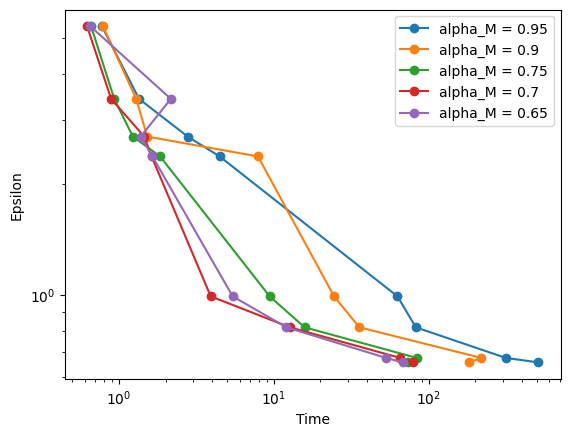

In [21]:
for alpha_M in alphas_M:
    epsilons = []
    nsims = []
    uniques = []
    times = []
    
    for M0 in M0s:
        nsim = np.sum(dico_os[M0][alpha_M]["N_sim"])
        epsilonn = dico_os[M0][alpha_M]["Eps_values"][-1]
        uniquee = dico_os[M0][alpha_M]["unique_part"][-1]
        timee = np.sum(dico_os[M0][alpha_M]['Time'])
        epsilons.append(epsilonn)
        nsims.append(nsim/(N_smc*uniquee))
        uniques.append(uniquee)
        times.append(timee)
    plt.plot(times, epsilons, label = "alpha_M = {}".format(alpha_M), marker = "o", linestyle = "-")
plt.xlabel("Time")
plt.ylabel("Epsilon")
plt.xscale("log")
plt.yscale("log")
plt.legend()

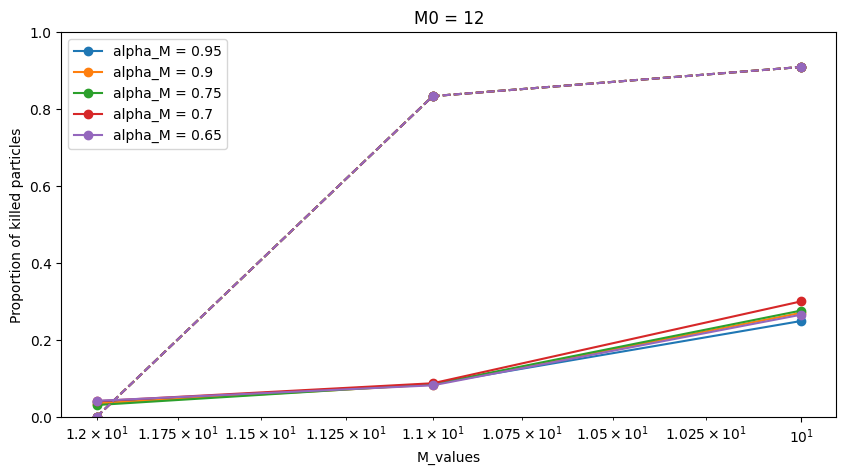

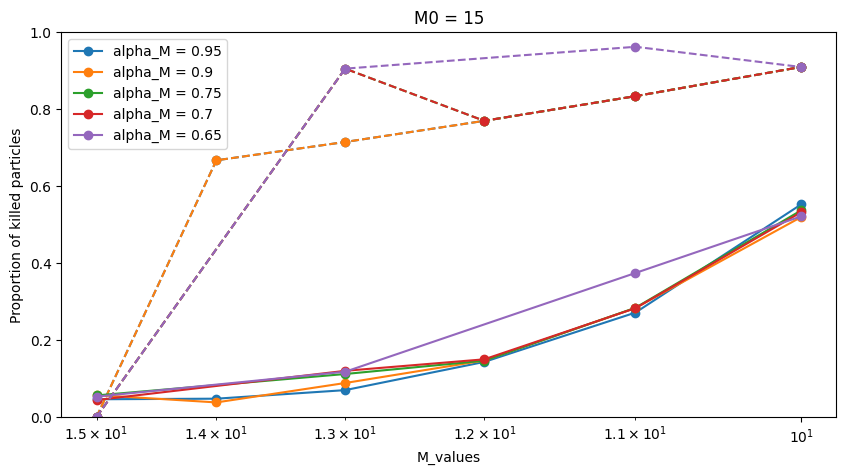

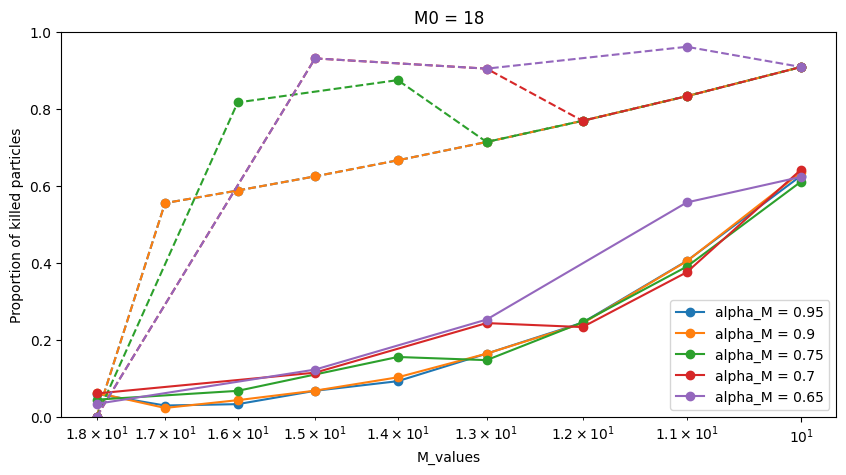

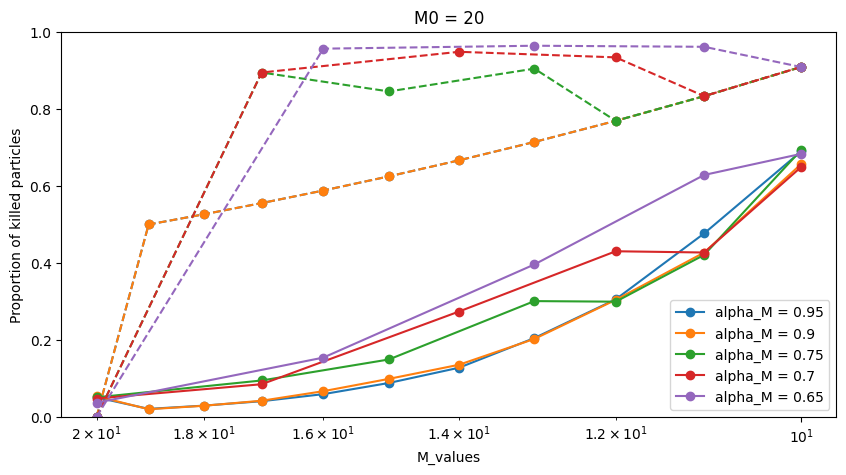

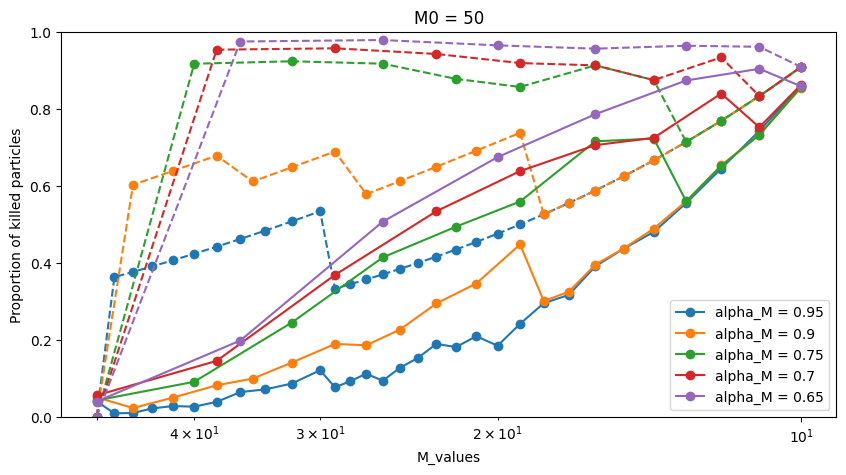

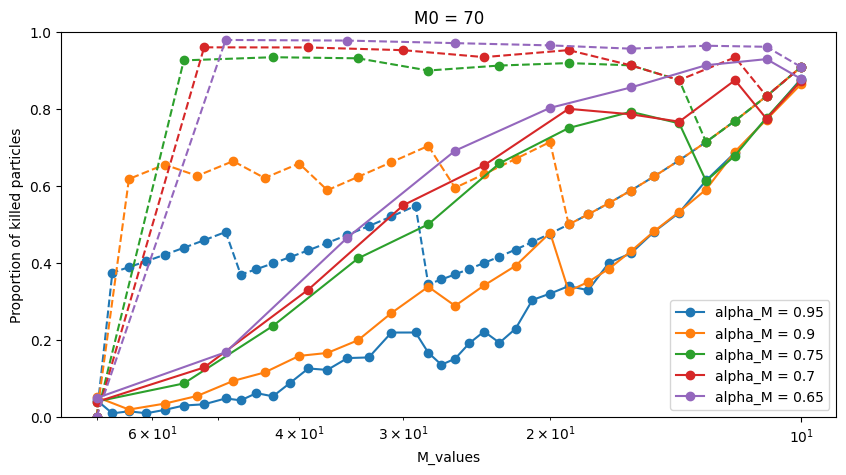

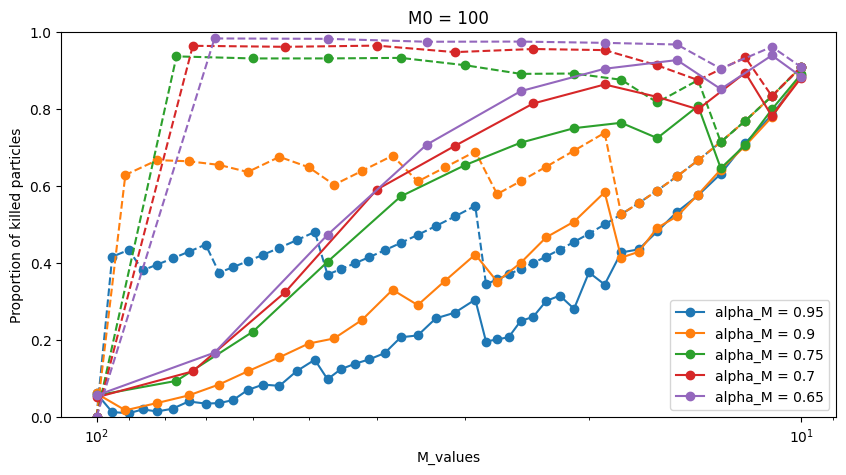

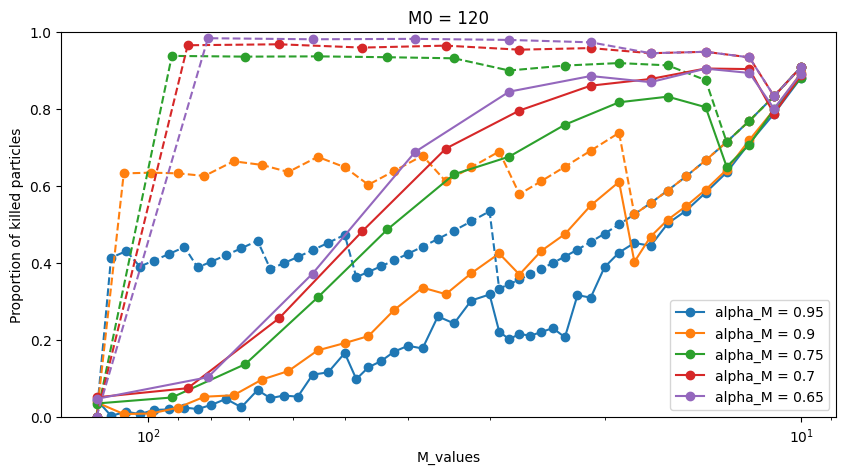

In [35]:
colors = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])
for M0 in M0s:
    epsilons = []
    nsims = []
    uniques = []
    times = []
    f, ax = plt.subplots(1, 1, figsize=(10, 5))

    for i, alpha_M in enumerate(alphas_M):
        prop_killed = dico_os[M0][alpha_M]["Prop_killed"]
        Ms = dico_os[M0][alpha_M]["M_values"]
        plt.plot(Ms, prop_killed, label = "alpha_M = {}".format(alpha_M), marker = "o", linestyle = "-", color = colors[i])
        prob_killed = proba_killed(M0, alpha_M)
        plt.plot(Ms, prob_killed, marker = "o", linestyle = "--", color = colors[i])
        # prob_killed = proba_killed(M0, alpha_M)
        # plt.plot(Ms, prob_killed, label = "alpha_M = {}".format(alpha_M), marker = "o", linestyle = "--")
    plt.xlabel("M_values")
    plt.ylabel("Proportion of killed particles")
    plt.gca().set_ylim(0, 1)
    plt.xscale("log")
    plt.gca().invert_xaxis()
    plt.legend()
    plt.title("M0 = {}".format(M0))
    plt.show()
    
  

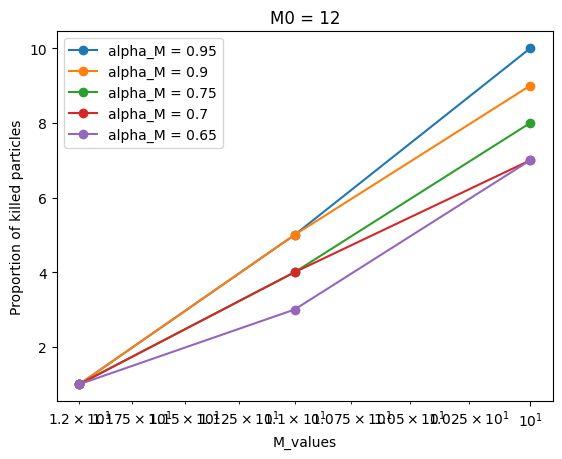

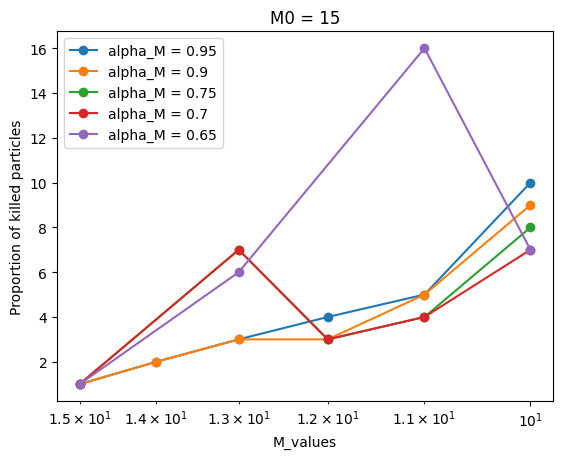

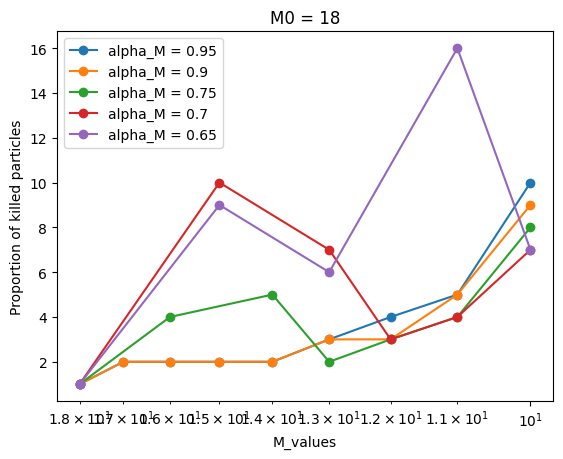

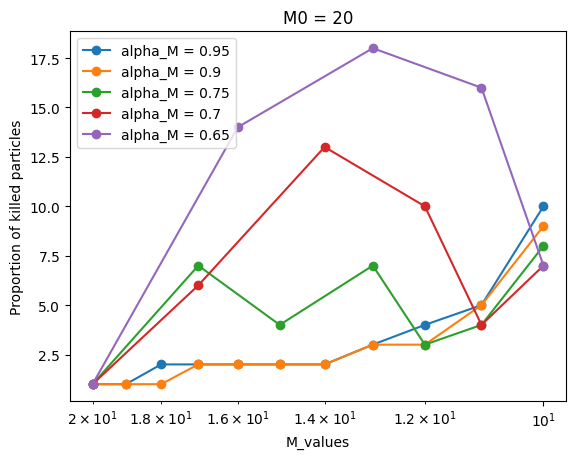

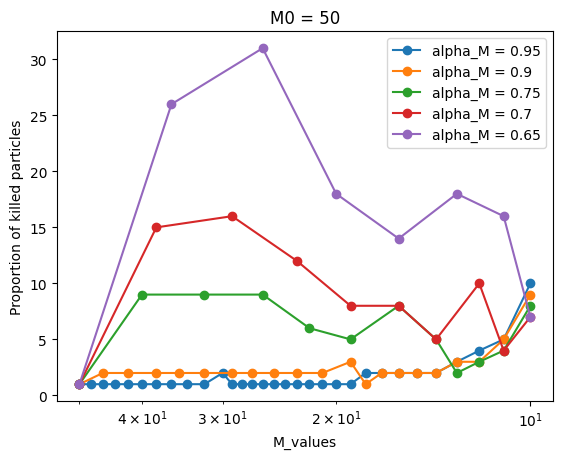

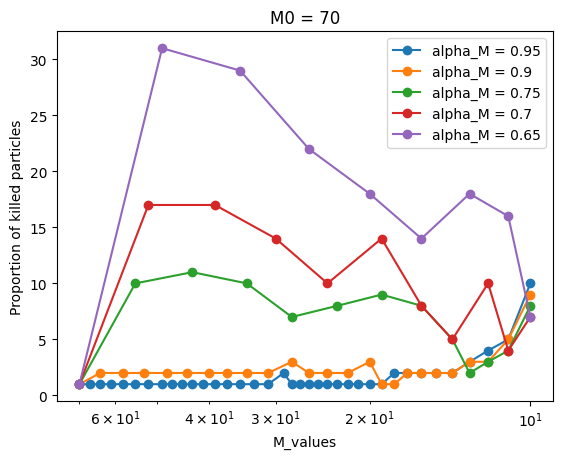

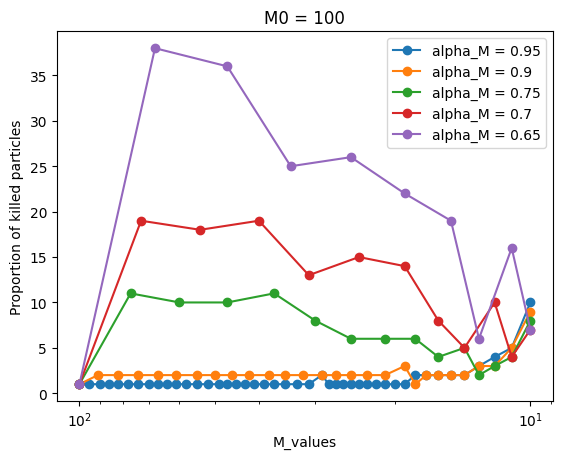

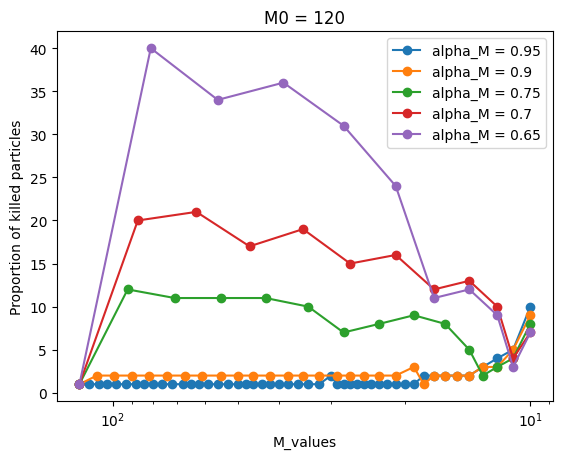

In [48]:
for M0 in M0s:
    epsilons = []
    nsims = []
    uniques = []
    times = []
    
    for alpha_M in alphas_M:
        Ms = M_values(M0, alpha_M)
        n_copy = num_copy(M0, alpha_M)
        n_copy = np.insert(n_copy,0,1)
        plt.plot(Ms, n_copy, label = "alpha_M = {}".format(alpha_M), marker = "o", linestyle = "-")
       
    plt.xlabel("M_values")
    plt.ylabel("Proportion of killed particles")
    # plt.gca().set_ylim(0, 1)
    plt.xscale("log")
    plt.gca().invert_xaxis()
    plt.legend()
    plt.title("M0 = {}".format(M0))
    plt.show()

# Under Matching


Text(0, 0.5, 'Epsilon')

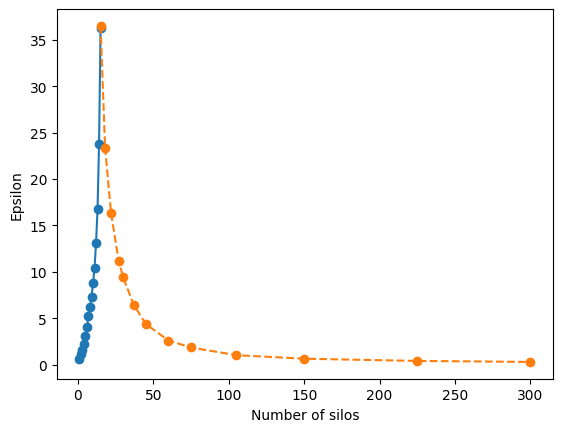

In [82]:
L0s = np.array(np.linspace(1, K, K), dtype=int)
alpha_epsilon = .95
N_smc = 10000
kernel = KernelTruncatedRW
key, subkey = random.split(key)
thetas = model.prior_generator(subkey, N_smc)
key, subkey = random.split(key)
zs = model.data_generator(subkey, thetas)
espilons = np.zeros(len(L0s))
for i, L0 in enumerate(L0s):
    dists_perm, ys_index, zs_index, _ = optimal_index_distance(model, zs, y_obs, M = L0)
    thetas_perm = thetas.apply_permutation(zs_index)
    
    epsilon = np.quantile(dists_perm, alpha_epsilon)
    espilons[i] = epsilon
M0s = np.array([1*K, 1.2*K, 1.5*K, 1.8*K, 2*K, 2.5*K, 3*K, 4*K,  5*K, 7*K, 10*K, 15*K, 20*K], dtype=int)
epsilons_M0 = np.zeros(len(M0s))
for i, M0 in enumerate(M0s):
    thetas = model.prior_generator(subkey, N_smc, M0)
    key, subkey = random.split(key)
    zs = model.data_generator(subkey, thetas)
    dists_perm, ys_index, zs_index, _ = optimal_index_distance(model, zs, y_obs, M = M0)
    epsilons_M0[i] = np.quantile(dists_perm, alpha_epsilon)
plt.plot(L0s, espilons, label = "alpha_M = {}".format(alpha_M), marker = "o", linestyle = "-")
plt.plot(M0s, epsilons_M0, label = "M0", marker = "o", linestyle = "--")
plt.xlabel("Number of silos")
plt.ylabel("Epsilon")
# plt.xscale("log")


# Dico UM

In [ ]:
from under_matching import perm_abc_smc_um
L0s = np.array(np.linspace(4, K, K), dtype=int)
alphas_L = np.array([.95,  .75])
dico_um = {}
kernel = KernelTruncatedRW
N_smc_um = 10000

for L0 in L0s:
    key, subkey = random.split(key)
    thetas = model.prior_generator(subkey, N_smc)
    key, subkey = random.split(key)
    zs = model.data_generator(subkey, thetas)
    dists_perm, ys_index, zs_index, _ = optimal_index_distance(model, zs, y_obs, L = L0)
    epsilon = np.quantile(dists_perm, alpha_epsilon)
    dico_um[L0] = {}
    for alpha_L in alphas_L:
        key, subkey = random.split(key)
        dico_um[L0][alpha_L] = perm_abc_smc_um(key = subkey, model = model, n_particles= N_smc_um, y_obs = y_obs, kernel = kernel, L_0 = L0, epsilon = epsilon, alpha_L = alpha_L, update_weights_distance= False, verbose = 2, Final_iteration= 0)

a) Simulation of the first particles:
b) Computing the first distances with L = 1: Performing full optimal assignment (no prior indices).
min = 0.029 max = 0.61 mean = 0.15
d) Setting the first weights: ESS = 9545
Iteration 0: L = 1 Epsilon = 0.25877370089292523, ESS = 9545 Acc. rate = 100% Numb. unique particles = 10000

a) Update L: new L = 2 old L = 1
b) Compute optimal distances: 9538 unique particles Performing full optimal assignment (no prior indices).
c) Update weights: Old ESS = 9545 New ESS = 5718 (40.09% of the particles killed)
f) Resampling: No resampling
d) Move particles:
1. Forward kernel: 
Silo 0: 19.08% matched! Thetas_match: min = 9.33, max = 12.1 mean = 10.6
Silo 1: 24.41% matched! Thetas_match: min = -9.38, max = -6.39 mean = -7.87
Silo 2: 23.10% matched! Thetas_match: min = -6.51, max = -3.91 mean = -5.27
Silo 3: 7.96% matched! Thetas_match: min = 2.31, max = 4.97 mean = 3.48
Silo 4: 11.91% matched! Thetas_match: min = -12.4, max = -9.68 mean = -11.1
Silo 5: 25.52

/Users/antoineluciano/.pyenv/versions/3.10.13/envs/jax_env/lib/python3.10/site-packages/jax/_src/numpy/reductions.py:289: RuntimeWarning: overflow encountered in cast
  return _reduce_sum(a, axis=_ensure_optional_axes(axis), dtype=dtype, out=out,


Sample proposal: loc min = -2e+38 max 2.8e+01 mean = -2e+33 glob min = 0.00064 max = 2.9 mean = 0.96
2. MH acceptance: ratio min = 0.0 max = 1.0 mean 0.0477
Prior ratio: min = -inf, max = 1.66, mean = -inf
Kernel ratio: min = nan, max = nan, mean = nan
3. Results: Acceptance = 4.67% Rejection ABC = 93.64% Rejection MH = 1.69%
Iteration 6: L = 8 Espilon = 0.5862, ESS = 10000 Acc. rate = 4.67% Uniqueness rate particules = 5.8% Uniqueness rate components = 5.8% Global parameters uniqueness rate = 5.8%

a) Update L: new L = 9 old L = 8
b) Compute optimal distances: 577 unique particles Performing full optimal assignment (no prior indices).
c) Update weights: Old ESS = 10000 New ESS = 66 (99.34% of the particles killed)
f) Resampling: Resampling... 22 unique particles left
d) Move particles:
1. Forward kernel: 
Silo 0: 98.49% matched! Thetas_match: min = 9.59, max = 11.6 mean = 10.6
Silo 1: 100.00% matched! Thetas_match: min = -8.8, max = -7.0 mean = -7.81
Silo 2: 100.00% matched! Thetas_ma

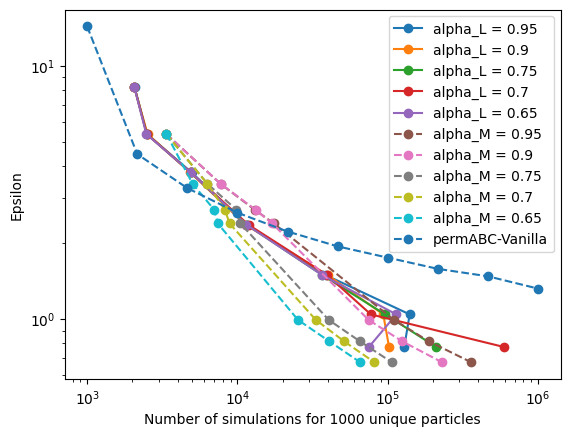

In [64]:
N_sample = 1000

for alpha_L in alphas_L: 
    nsims = []
    epsilons = []
    uniques = []
    times = []
    for L0 in L0s:
        if dico_um[L0][alpha_L]!=None:
            nsim = np.sum(dico_um[L0][alpha_L]["N_sim"])
            epsilonn = dico_um[L0][alpha_L]["Eps_values"][-1]
            uniquee = dico_um[L0][alpha_L]["unique_part"][-1]
            timee = np.sum(dico_um[L0][alpha_L]['Time'])
            nsims.append(nsim/(K*N_smc_um*uniquee)*N_sample)
            epsilons.append(epsilonn)
            uniques.append(uniquee)
            times.append(timee)
    plt.plot(nsims, epsilons, label = "alpha_L = {}".format(alpha_L), marker = "o", linestyle = "-")
for alpha_M in alphas_M:
    epsilons = []
    nsims = []
    uniques = []
    times = []
    
    for M0 in M0s:
        nsim = np.sum(dico_os[M0][alpha_M]["N_sim"])
        epsilonn = dico_os[M0][alpha_M]["Eps_values"][-1]
        uniquee = dico_os[M0][alpha_M]["unique_part"][-1]
        timee = np.sum(dico_os[M0][alpha_M]['Time'])
        epsilons.append(epsilonn)
        nsims.append(nsim/(K*N_smc*uniquee)*N_sample)
        uniques.append(uniquee)
        times.append(timee)
    plt.plot(nsims, epsilons, label = "alpha_M = {}".format(alpha_M), marker = "o", linestyle = "--")

plt.plot(N_sample/alphas, epsilons_van_perm, label = "permABC-Vanilla", marker = "o", linestyle = "--")

plt.xlabel("Number of simulations for {} unique particles".format(N_sample))
plt.ylabel("Epsilon")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()
# M0s = np.array([1.2*K, 1.5*K, 1.8*K, 2*K,  5*K, 7*K, 10*K], dtype=int)

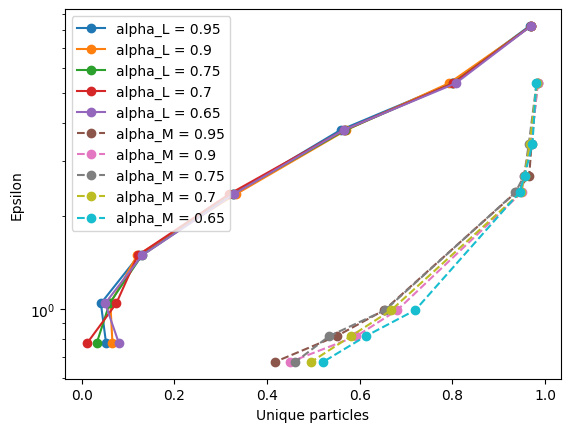

In [58]:
for alpha_L in alphas_L: 
    nsims = []
    epsilons = []
    uniques = []
    times = []
    for L0 in L0s:
        if dico_um[L0][alpha_L]!=None:
            nsim = np.sum(dico_um[L0][alpha_L]["N_sim"])
            epsilonn = dico_um[L0][alpha_L]["Eps_values"][-1]
            uniquee = dico_um[L0][alpha_L]["unique_part"][-1]
            timee = np.sum(dico_um[L0][alpha_L]['Time'])
            nsims.append(nsim/(N_smc*uniquee))
            epsilons.append(epsilonn)
            uniques.append(uniquee)
            times.append(timee)
    plt.plot(uniques, epsilons, label = "alpha_L = {}".format(alpha_L), marker = "o", linestyle = "-")
M0s = np.array([1.2*K, 1.5*K, 1.8*K, 2*K,  5*K, 7*K, 10*K], dtype=int) 

for alpha_M in alphas_M:
    epsilons = []
    nsims = []
    uniques = []
    times = []
    
    for M0 in M0s:
        nsim = np.sum(dico_os[M0][alpha_M]["N_sim"])
        epsilonn = dico_os[M0][alpha_M]["Eps_values"][-1]
        uniquee = dico_os[M0][alpha_M]["unique_part"][-1]
        timee = np.sum(dico_os[M0][alpha_M]['Time'])
        epsilons.append(epsilonn)
        nsims.append(nsim/(N_smc*uniquee))
        uniques.append(uniquee)
        times.append(timee)
    plt.plot(uniques, epsilons, label = "alpha_M = {}".format(alpha_M), marker = "o", linestyle = "--")

plt.xlabel("Unique particles")
plt.ylabel("Epsilon")
# plt.xscale("log")
plt.yscale("log")
plt.legend()


In [57]:
for alpha_L in alphas_L: 
    nsims = []
    epsilons = []
    uniques = []
    times = []
    for L0 in L0s:
        if dico_um[L0][alpha_L]==None:
            print("L0 = {} alpha_L = {}".format(L0, alpha_L))

L0 = 1 alpha_L = 0.95
L0 = 2 alpha_L = 0.95
L0 = 3 alpha_L = 0.95
L0 = 1 alpha_L = 0.9
L0 = 2 alpha_L = 0.9
L0 = 3 alpha_L = 0.9
L0 = 1 alpha_L = 0.75
L0 = 2 alpha_L = 0.75
L0 = 3 alpha_L = 0.75
L0 = 1 alpha_L = 0.7
L0 = 2 alpha_L = 0.7
L0 = 3 alpha_L = 0.7
L0 = 1 alpha_L = 0.65
L0 = 2 alpha_L = 0.65
L0 = 3 alpha_L = 0.65


# Epsilons' choice

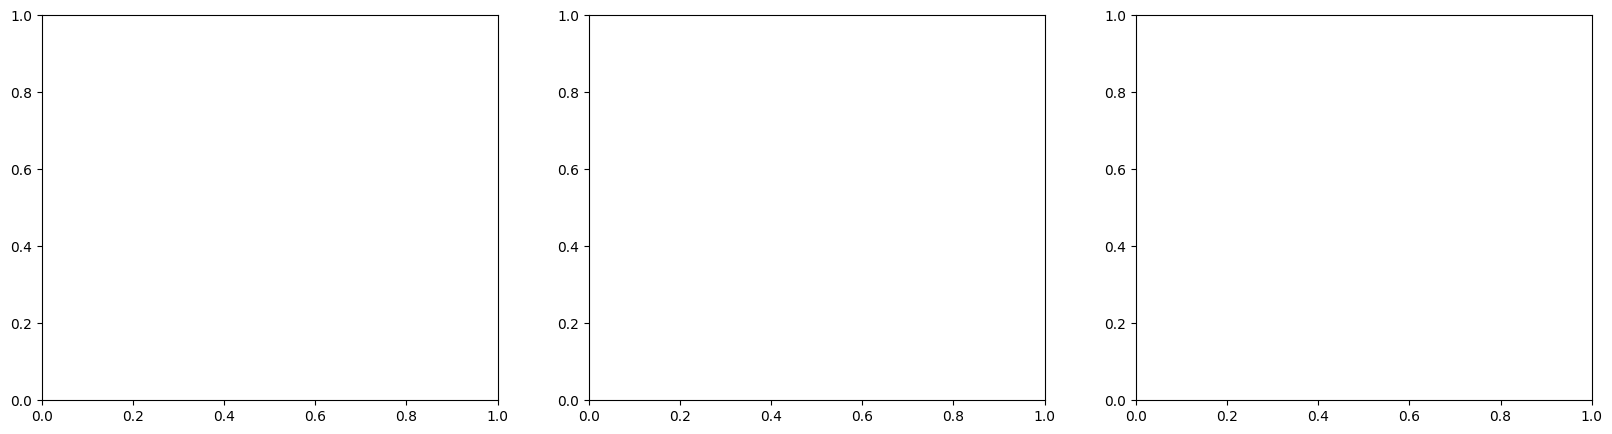

In [65]:
# Comparison
N_sample = 10000

key, subkey = random.split(key)
thetas = model.prior_generator(subkey, N_sample)
key, subkey = random.split(key)
zs = model.data_generator(subkey, thetas)
dists_perm, ys_index, zs_index, _ = optimal_index_distance(model, zs, y_obs, M = K)
alphas = np.logspace(0, -3, 10)
epsilons_van_perm = np.quantile(dists_perm, alphas)


alpha_epsilon = .95
M0s = np.arange(K+1, 10*K)
N_OS = 10000
thetas = model.prior_generator(subkey, N_OS, n_silos= np.max(M0s))
zs = model.data_generator(key, thetas)
thetas_M = []
epsilons_os = np.zeros(len(M0s))
N_plot = 2
f, ax = plt.subplots(1, N_plot+1, figsize=(20, 5))
for j, M0 in enumerate(M0s):
    zs_os = zs.copy()[:, :M0]
    dists_perm, ys_index, zs_index, _ = optimal_index_distance(model, zs_os, y_obs, M = M0)
    epsilons_os[j] = np.quantile(dists_perm, alpha_epsilon)
    


In [ ]:
closest_epsilons = []
closest_M0s = []
# Comparison

N_sample = 10000000

key, subkey = random.split(key)
thetas = model.prior_generator(subkey, N_sample)
key, subkey = random.split(key)
zs = model.data_generator(subkey, thetas)
dists_perm, ys_index, zs_index, _ = optimal_index_distance(model, zs, y_obs, M = K)

alphas = np.logspace(0, -7, 10)
epsilons_van_perm = np.quantile(dists_perm, alphas)
M0s = []
for epsilon_van in epsilons_van_perm:
    index = np.argmin(np.abs(epsilons_os - epsilon_van))
    closest_epsilons.append(epsilons_os[index])
    M0s.append(M0s_test[index])
    
for epsilon_van, epsilon_closest, M0 in zip(epsilons_van_perm, closest_epsilons, closest_M0s):
    print(f"Vanilla epsilon: {epsilon_van:.4f}, Closest epsilon: {epsilon_closest:.4f}, M0: {M0}")

: 

In [78]:
np.min(dists_perm)

0.7614408

In [ ]:
closest_epsilons = []
closest_M0s = []
# Comparison

N_sample = 1000000

key, subkey = random.split(key)
thetas = model.prior_generator(subkey, N_sample)
key, subkey = random.split(key)
zs = model.data_generator(subkey, thetas)
dists_perm, ys_index, zs_index, _ = optimal_index_distance(model, zs, y_obs, M = K)

alphas = np.logspace(0, -4, 10)
epsilons_van_perm = np.quantile(dists_perm, alphas)

for epsilon_van in epsilons_van_perm:
    index = np.argmin(np.abs(epsilons_os - epsilon_van))
    closest_epsilons.append(epsilons_os[index])
    closest_M0s.append(M0s[index])

for epsilon_van, epsilon_closest, M0 in zip(epsilons_van_perm, closest_epsilons, closest_M0s)
    print(f"Vanilla epsilon: {epsilon_van:.4f}, Closest epsilon: {epsilon_closest:.4f}, M0: {M0}")

Vanilla epsilon: 13.9672, Closest epsilon: 6.4017, M0: 11
Vanilla epsilon: 4.4967, Closest epsilon: 4.4991, M0: 13
Vanilla epsilon: 3.3281, Closest epsilon: 3.2052, M0: 16
Vanilla epsilon: 2.6791, Closest epsilon: 2.7228, M0: 18
Vanilla epsilon: 2.2698, Closest epsilon: 2.2088, M0: 21
Vanilla epsilon: 1.9636, Closest epsilon: 1.9709, M0: 23
Vanilla epsilon: 1.7697, Closest epsilon: 1.8075, M0: 25
Vanilla epsilon: 1.6127, Closest epsilon: 1.5807, M0: 28
Vanilla epsilon: 1.5041, Closest epsilon: 1.5153, M0: 29
Vanilla epsilon: 1.4177, Closest epsilon: 1.4273, M0: 31
